# TC2- MACHINE LEARNING: CLASIFICACION DE LIRIOS
## Cuaderno 1: Implementación de Naive Bayes

#### Integrantes del Grupo Nº1
| NOMBRES Y APELLIDOS | CODIGO |ROL|
|:----------|----------|:----------|
| Ortiz Abanto Kevin Miguel| 20200230 | Integrante|
| Pachas Lopez Nabia Jazmin| 20200231 | Integrante| 
| Retuerto Santillan Mauro Alejandro| 20200202 | Coordinador|

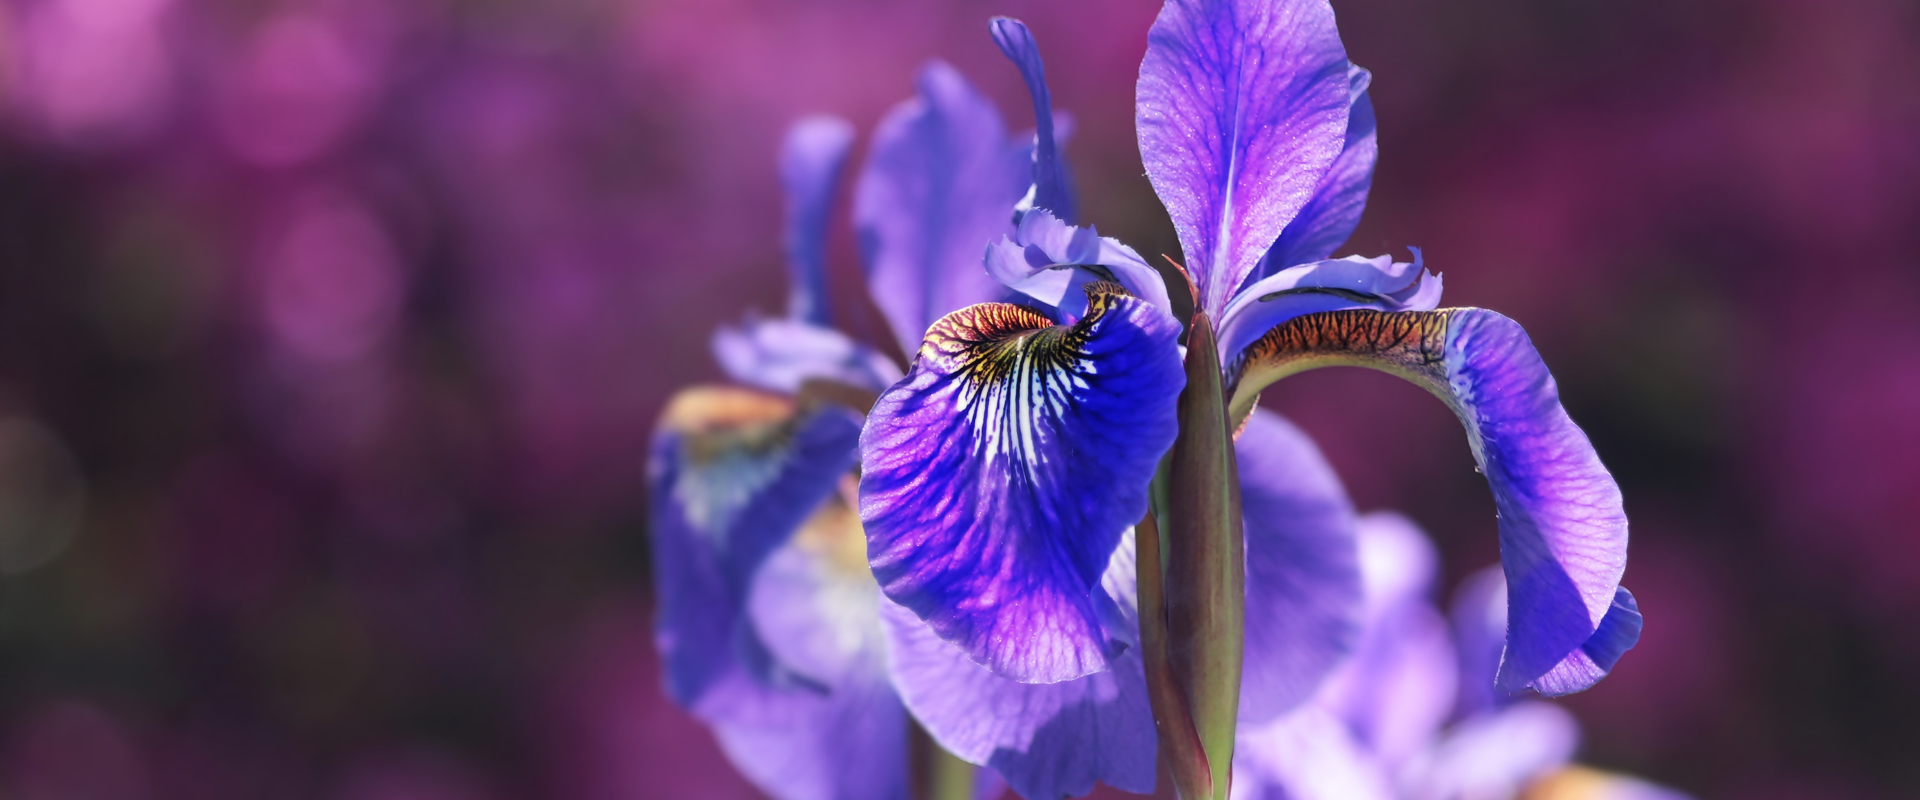

In [126]:
from IPython.display import Image
i = Image(filename='img_portadas\\iris.png')
i

## 1.BIBLIOTECAS UTILIZADAS
Para la codificación de la interfaz se utilizaron 6 bibliotecas:
- **numpy:** Proporciona una estructura de datos eficiente y de alto rendimiento llamada "ndarray" (array multidimensional).
- **pandas:** Proporciona estructuras de datos eficientes y flexibles para trabajar con datos tabulares, como tablas y hojas de cálculo.
- **seaborn:**  Proporciona una variedad de funciones y herramientas que facilitan la creación de gráficos estadísticos.
- **matplotlib:**  Es una biblioteca de visualización de datos en Python ampliamente utilizada. 
- **scikit-learn:** También conocido como sklearn, es una biblioteca de aprendizaje automático (machine learning) en Python. Proporciona una amplia gama de algoritmos y herramientas para realizar tareas comunes de aprendizaje automático.
- **h5py:** Es una biblioteca de Python que proporciona una interfaz para trabajar con el formato de archivo Hierarchical Data Format version 5 (HDF5).

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
import h5py

## 1. EXTRACCION Y VISUALIZACIÓN DE LA DATA

Se extrae el conjunto de datos a partir del archivo `IRIS.csv` y se muestra los primeros 5 registros.

In [128]:
iris_datos = pd.read_csv('IRIS.csv')
iris_datos.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Se utiliza la funcion `info()` para visualizar los nombres de las columnas, su tipo de dato y para saber si pueden ser `null`.

In [129]:
iris_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Se extraen las principales medidas estadisticas de los 4 vectores de entrada. Como se observa dichos vectores son:
- **X1** (`sepal_length`): Longitud en cm del largo del sépalo del lirio (Iris).

- **X2** (`sepal_width`): Ancho en cm del sépalo del lirio.

- **X3** (`petal_length`): Longitud en cm del largo del petalo del lirio.

- **X4** (`petal_width`): Ancho en cm del petalo del lirio.

In [130]:
iris_datos.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Se realiza el conteo de cuantos ejemplares existen por cada clase (etiqueta).

In [131]:
iris_datos['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Se utiliza el gráfico `pairplot()` de la libreria SeaBorn. Este tipo de gráfico se utiliza para visualizar las relaciones entre múltiples variables en un conjunto de datos. En el caso del conjunto de datos Iris, cada par de variables se representa en un gráfico de dispersión, donde cada punto en el gráfico representa una muestra de una especie de Iris específica.

El parámetro hue='species' indica que se desea colorear los puntos en función de la especie de Iris a la que pertenecen. Esto permite visualizar cómo se distribuyen las muestras de cada especie en relación con las diferentes variables.

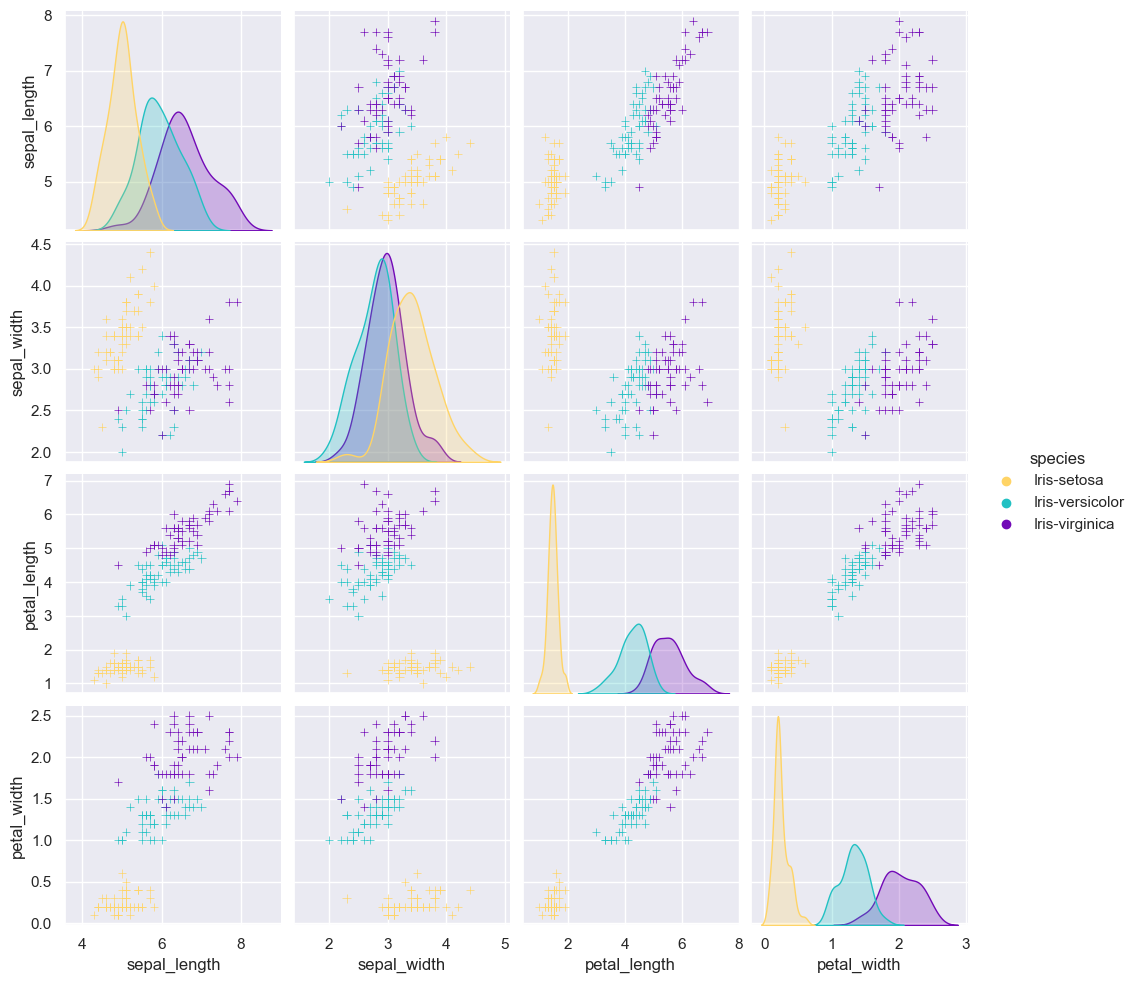

In [132]:
palette = ["#FFD466", "#22C1C3","#7209B7", "#3A0CA3", "#4361EE"]
sns.set_palette(palette)
g = sns.pairplot(iris_datos, hue='species', markers='+')
plt.show()

A continuación se usa un `violinplot()` para visualizar la distribución. Un violin plot es una representación gráfica que combina un diagrama de caja (box plot) y un gráfico de densidad. Se utiliza para visualizar la distribución de una variable numérica en diferentes categorías.

En los gráficos presentados a continuación, cada violín representa una categoría (especie de Iris) y muestra la distribución de la variable numérica (longitud del sépalo, por ejemplo) en esa categoría. El ancho del violín representa la densidad de la distribución, donde un violín más ancho indica una mayor densidad de valores.

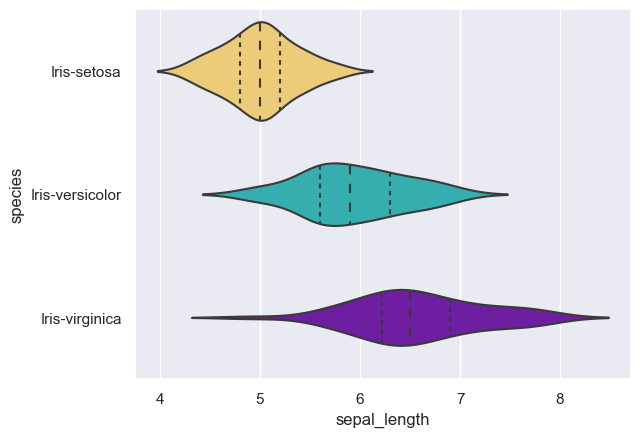

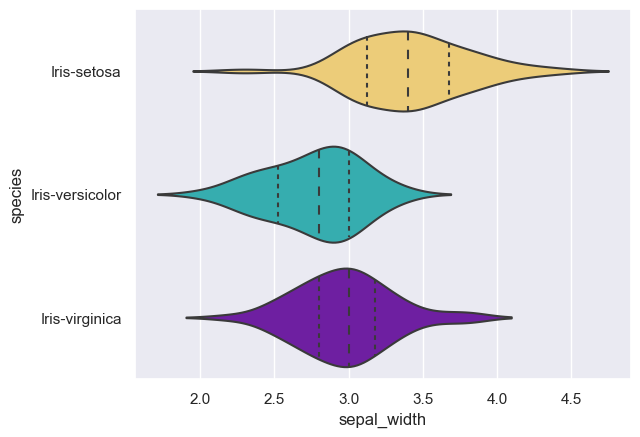

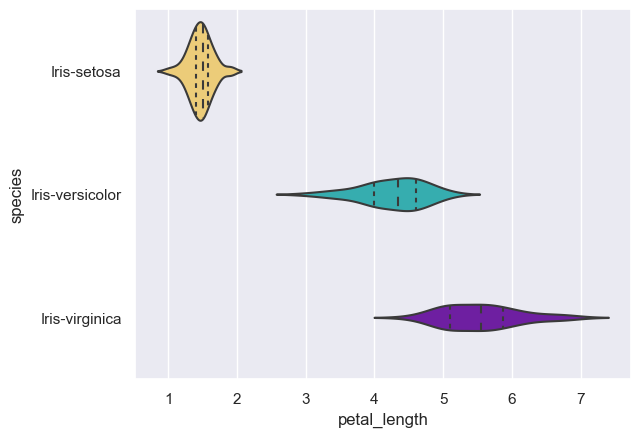

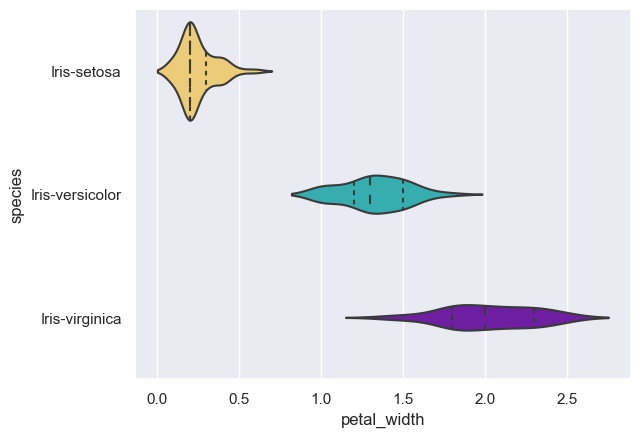

In [133]:
g = sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
plt.show()

Después de haber terminado de analizar el gráfico de violin, se calcula las correlaciones con la funcion `corr()`.

In [134]:
corr = iris_datos.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


A continuación, se genera un gráfico de mapa de calor (heatmap) utilizando la biblioteca seaborn. Hay que recordar que un mapa de calor es una representación visual de una matriz de datos en forma de una cuadrícula coloreada, a la cual se le pasa como parametro a `corr`, que es una matriz de correlación entre variables.

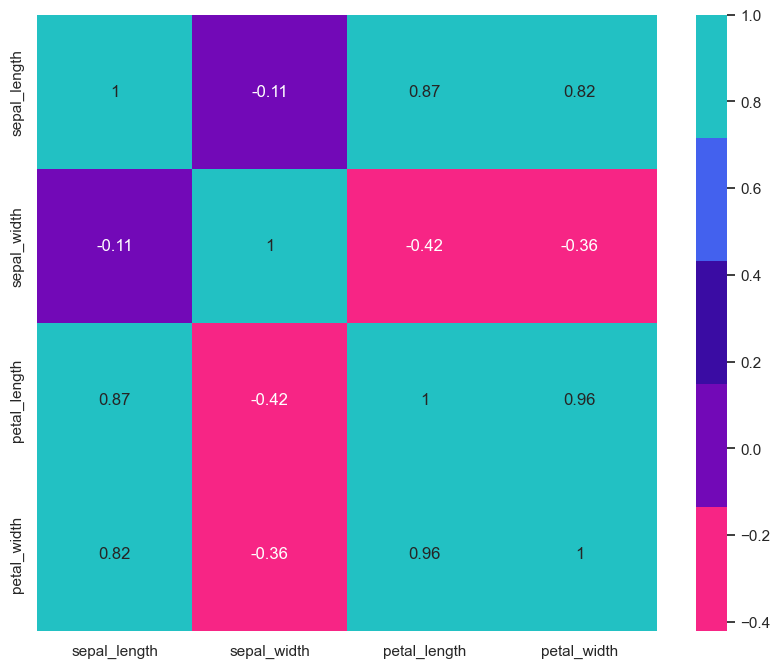

In [135]:
palette = ["#F72585", "#7209B7","#3A0CA3", "#4361EE", "#22C1C3"]
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap=palette, annot=True)
plt.show()

## 2. PREPROCESAMIENTO DE LA DATA

A partir de la data obtenida del CSV, se separan los vectores de entrada(X), del vector de salida (Y).

In [136]:
X = data.drop(['species'], axis=1)
print(X.values)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [137]:
y_labels = data['species']
print(y_labels.values)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

Para el vector de salida y se realiza una codificación para poder transformar los valores categoricos en numéricos. Como se observa a partir de este proceso se obtienq que Iris-setosa es 0, Iris-versicolor es 1 e Iris-virginica es 2.

In [138]:
y = np.where(y_labels.values== "Iris-setosa", 0, np.where(y_labels.values == "Iris-versicolor", 1, 2))
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Después de ello se realiza la división de los datos en conjuntos de entrenamiento y evaluación utilizando la función `train_test_split` de la biblioteca scikit-learn.

Dicho metodo a `X` y a `y` y los divide en cuatro partes distintas:

- `X_entr` (X de entrenamiento): Contiene una parte del conjunto de características X que se utilizará para entrenar un modelo.

- `X_eval` (X de evaluación): Contiene otra parte del conjunto de características X que se utilizará para evaluar el rendimiento del modelo.

- `y_entr` (y de entrenamiento): Contiene la parte correspondiente de la variable objetivo y que se utilizará para entrenar el modelo.

- `y_eval` (y de evaluación): Contiene la parte correspondiente de la variable objetivo y que se utilizará para evaluar el rendimiento del modelo.

La proporción en la que se divide los datos entre los conjuntos de entrenamiento y evaluación se establece mediante el parámetro `test_size`, que se establece en 0.2 en este caso, lo que significa que el 20% de los datos se asignarán al conjunto de evaluación y el 80% se asignarán al conjunto de entrenamiento.

El parámetro `random_state` se utiliza para asegurar que la división de los datos sea reproducible. Al especificar un número entero, como 42 en este caso, se garantiza que la misma división se obtendrá cada vez que se ejecute el código.

In [139]:
X_entr, X_eval, y_entr, y_eval = train_test_split(X.values, y, test_size=0.2, random_state=42)
print(X_entr.shape)
print(y_entr.shape)
print(X_eval.shape)
print(y_eval.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [140]:
print(X_entr.dtype)
print(y_entr.dtype)
print(X_eval.dtype)
print(y_eval.dtype)

float64
int32
float64
int32


## 2. CONSTRUCCION DEL MODELO NAIVE BAYES

La clase NaiveBayes es una implementación del algoritmo de Naive Bayes para clasificación. Entre sus métodos implementados tenemos:

- `__init__(self)`: Este método es el constructor de la clase. Inicializa las variables necesarias para almacenar los parámetros y estadísticas del modelo de Naive Bayes, como las medias, las probabilidades de clase, las varianzas y el número de características y clases.

- `fit(self, X, y)`: Este método se utiliza para entrenar el modelo. Recibe como entrada una matriz `X` que representa las características de los datos de entrenamiento y un vector `y` que contiene las etiquetas de clase correspondientes. En este método, se calculan las probabilidades de clase y se estima la media y la varianza de cada característica para cada clase.

- `calculate_class_probabilities(self, y)`: Este método se utiliza para calcular las probabilidades de cada clase. Recibe como entrada el vector de etiquetas de clase `y`. En este método, se cuenta el número de instancias pertenecientes a cada clase y se divide por el total de instancias para obtener las probabilidades de clase.

- `calculate_gaussian_probability(self, x, mean, variance)`: Este método se utiliza para calcular la probabilidad de una característica continua en base a la distribución gaussiana. Recibe como entrada el valor x de la característica, la media mean y la varianza variance. Utilizando la fórmula de la distribución gaussiana, se calcula la probabilidad y se retorna.

- `predict(self, X)`: Este método se utiliza para realizar predicciones utilizando el modelo entrenado.

- `save_model(self, filename)`: Este método se utiliza para guardar el modelo entrenado en un archivo h5. Recibe como entrada el nombre del archivo filename. Se crea un archivo h5 y se almacenan los diferentes parámetros y estadísticas del modelo, como las clases, el número de clases, el número de características, las probabilidades de clase, las medias y las varianzas.

- `load_model(self, filename)`: Este método se utiliza para cargar un modelo entrenado desde un archivo h5. Recibe como entrada el nombre del archivo filename.

In [148]:
class NaiveBayes:
    
    def __init__(self):
        self.mean = None
        self.class_probabilities = None
        self.variance = None
        self.num_features = None
        self.num_classes = None
        self.classes = None
    
    # Función para el entrenamiento
    def fit(self, X, y):
        # Se obtiene todas las clases únicas presentes en el vector de etiquetas 
        self.classes = np.unique(y)
        
        # Se almacena la cantidad de clases presentes
        self.num_classes = len(self.classes)
        
        # Se obtiene el numero de columnas del vector X (caracteristicas)
        self.num_features = X.shape[1]
        
        # Se calcula las medias y varianzas de las características para cada clase
        self.class_probabilities = self.calculate_class_probabilities(y)
        self.mean, self.variance = self.calculate_mean_and_variance(X, y)

    # Calculo de las probabilidades de cada clase
    def calculate_class_probabilities(self, y):
        class_counts = np.zeros(self.num_classes)
        for i in range(self.num_classes):
            class_counts[i] = np.sum(y == self.classes[i])
        return class_counts / len(y)

    # Calculo de la media y la varianza de los datos por cada clase
    def calculate_mean_and_variance(self, X, y):
        # Se crea un array de ceros para almacenar las medias de las características.
        mean = np.zeros((self.num_classes, self.num_features))
        variance = np.zeros((self.num_classes, self.num_features))
        
        for i in range(self.num_classes):
            #Se seleccionan las filas en la matriz de características X que corresponden a la clase actual en la iteración.
            X_class = X[y == self.classes[i]]
            
            # Se calcula la media y la varianza
            mean[i] = np.mean(X_class, axis=0)
            variance[i] = np.var(X_class, axis=0)
        return mean, variance

    # Calculo de la probabilidad de una caracteristica continua
    def calculate_gaussian_probability(self, x, mean, variance):
        # Se calcula el exponente de la función de densidad de probabilidad Gaussiana
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        # Se calcula la probabilidad utilizando la fórmula de la función de densidad de probabilidad
        probability = (1 / np.sqrt(2 * np.pi * variance)) * exponent
        return probability

    # Realiza las predicciones del modelo
    def predict(self, X):
        predictions = []
        
        # Itera sobre cada muestra de los datos de entrada.
        for i in range(len(X)):
            #Crea una lista vacía para almacenar las probabilidades calculadas para cada clase.
            probabilities = []
            
            # Itera sobre cada clase.
            for j in range(self.num_classes):
                #Obtiene la probabilidad de la clase actual.
                class_probability = self.class_probabilities[j]
                
                #Crea un arreglo de ceros para almacenar las probabilidades de las características de la clase actual.
                feature_probabilities = np.zeros(self.num_features)
                
                #Itera sobre cada característica.
                for k in range(self.num_features):
                    # Obtiene el valor de la característica para la muestra actual.
                    feature_value = X[i, k]
                    
                    #Obtiene la media de la característica para la clase actual.
                    mean = self.mean[j, k]
                    
                    #Obtiene la varianza de la característica para la clase actual.
                    variance = self.variance[j, k]
                    
                    #Calcula la probabilidad de la característica dada la distribución Gaussiana de la clase actual y la almacena
                    feature_probabilities[k] = self.calculate_gaussian_probability(feature_value, mean, variance)
                
                #Calcula la verosimilitud multiplicando las probabilidades de todas las características.
                likelihood = np.prod(feature_probabilities)
                
                #Calcula la probabilidad total para la clase actual multiplicando la probabilidad de la clase por la verosimilitud
                probabilities.append(class_probability * likelihood)
                
            #Agrega la clase correspondiente a la probabilidad máxima a la lista de predicciones.
            predictions.append(self.classes[np.argmax(probabilities)])
        return predictions

    # Función para guardar el modelo entrenado en un archivo h5
    def save_model(self, filename):
        with h5py.File(filename, 'w') as file:
            #Se guarda todas las caracteristicas que definen al modelo
            file.create_dataset('classes', data=self.classes)
            file.create_dataset('num_classes', data=self.num_classes)
            file.create_dataset('num_features', data=self.num_features)
            file.create_dataset('class_probabilities', data=self.class_probabilities)
            file.create_dataset('mean', data=self.mean)
            file.create_dataset('variance', data=self.variance)

    # Función para cargar un modelo entrenado desde un archivo h5
    def load_model(self, filename):
        with h5py.File(filename, 'r') as file:
            #Se extraen todas las caracteristicas que definen al modelo
            self.classes = file['classes'][:]
            self.num_classes = file['num_classes'][()]
            self.num_features = file['num_features'][()]
            self.class_probabilities = file['class_probabilities'][:]
            self.mean = file['mean'][:]
            self.variance = file['variance'][:]
            

## 3. APLICACIÓN DEL MODELO NAIVE BAYES

A partir del modelo construido en el apartado anterior, se realiza el entrenamiento del modelo con la data  separada para esta fase: `X_entr`, `y_entr`.

In [142]:
nb = NaiveBayes()
nb.fit(X_entr, y_entr)

## 4. EVALUACION DEL MODELO NAIVE BAYES

Se realiza la validación del modelo utilizando la función `predict()`.

In [143]:
y_est = nb.predict(X_eval)

Se calculan algunas métricas relevantes tanto utilizando un método implementado desde cero como tambien haciendo uso de los métodos proporcionados por Scikit-Learn:

- **Reporte Propio**

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calcular_ratios(y_val, y_pred):
    matrix = confusion_matrix(y_val, y_pred) 
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    print(f"\nMatriz de Confusión:\n{matrix}") 
    print(f"\nExactitud del modelo: {accuracy}")
    print(f"\nPrecision del modelo: {precision}")
    print(f"\nSensibilidad del modelo: {recall}")
    print(f"\nF-measure del modelo: {f1}")

In [145]:
y_eval

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [146]:
y_est = np.array(y_est)
y_est

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [147]:
calcular_ratios(y_eval, y_est)


Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Exactitud del modelo: 1.0

Precision del modelo: 1.0

Sensibilidad del modelo: 1.0

F-measure del modelo: 1.0


- **Reporte de ScikitLearn**

In [105]:
from sklearn. metrics import classification_report

print(classification_report(y_eval, y_est, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- **Matriz de Confusion:**
Se calcula la matriz de confusion y como se puede apreciar el modelo fue capaz de clasiificar correctamente todas las especies de Iris-setosa,Iris-versicolor, e Iris-virginica. En total se tienen 10, 9 y 11 ejemplares de cada una respectivamente.

In [107]:
from sklearn.metrics import confusion_matrix 
matriz = confusion_matrix(y_eval, y_est) 
print('Matriz de Confusión:') 
print(matriz) 

Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


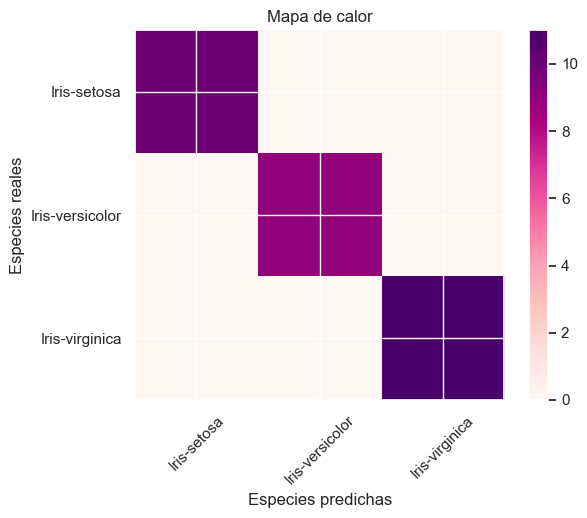

In [120]:
import matplotlib.pyplot as plt
plt.title('Mapa de calor')
plt.imshow(matriz, interpolation="nearest", cmap=plt.cm.RdPu)
plt.colorbar()
etiquetas = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
tick_marks = np.arange(len(etiquetas))
plt.xticks(tick_marks, etiquetas, rotation=45)
plt.yticks(tick_marks, etiquetas)
plt.xlabel("Especies predichas")
plt.ylabel("Especies reales")
plt.show()

Luego de obtener una precisión y exactitud del 100% para nuestro modelo Naive Bayes entrenado a partir del dataset Iris, podemos apreciar que el modelo tiene un rendimiento muy alto en la clasificación de las diferentes especies de lirios del dataset.

Una precisión del 100% significa que el modelo es capaz de predecir correctamente la clase de una flor en el 100% de los casos. Esto indica que el modelo tiene una gran capacidad para distinguir entre las diferentes especies de lirios en función de las características del sepalo y el petalo.

Asimismo la exactitud del 100% tambien nos indica que el modelo clasifica correctamente todas de las instancias del dataset Iris. Esto significa que el modelo tiene una nula tasa de errores y es altamente confiable en su capacidad para predecir la especie de una flor en función de las características proporcionadas.

Estos resultados sugieren que el modelo Naive Bayes es altamente efectivo para el problema de clasificación de las especies de flores en el dataset Iris. Esto es especialmente impresionante considerando que el dataset Iris es un problema clásico y desafiante en el campo de la clasificación.